In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt 
import matplotlib.pyplot as plt

In [2]:
tickers = ['QQQ','VXX','SOXX']

now = dt.datetime.now()
df = yf.download(tickers, '2019-01-01', now)['Adj Close']

df

[*********************100%***********************]  3 of 3 completed


,QQQ,SOXX,VXX
Date,,,
2019-01-02,152.375031,153.382339,182.960007
2019-01-03,147.396896,144.436981,190.559998
2019-01-04,153.703201,150.954193,175.440002
2019-01-07,155.533112,153.741714,171.520004
2019-01-08,156.939987,153.071548,168.039993
...,...,...,...
2021-08-20,367.730011,445.730011,27.760000
2021-08-23,373.230011,458.279999,26.809999
2021-08-24,374.369995,458.279999,26.709999


In [3]:
df_pct = df.pct_change()
df_pct

,QQQ,SOXX,VXX
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.032670,-0.058321,0.041539
2019-01-04,0.042785,0.045121,-0.079345
2019-01-07,0.011905,0.018466,-0.022344
2019-01-08,0.009046,-0.004359,-0.020289
...,...,...,...
2021-08-20,0.010358,0.007504,-0.075129
2021-08-23,0.014957,0.028156,-0.034222
2021-08-24,0.003054,0.000000,-0.003730


In [4]:
df1 = df.rolling(30).corr()
df1.tail()

QQQ      SOXX       VXX
Date                                         
2021-08-25 SOXX  0.758845  1.000000 -0.544759
           VXX  -0.756968 -0.544759  1.000000
2021-08-26 QQQ   1.000000  0.755449 -0.774054
           SOXX  0.755449  1.000000 -0.564826
           VXX  -0.774054 -0.564826  1.000000

In [5]:
df2 = df_pct.rolling(30).corr()
df2.tail()

QQQ      SOXX       VXX
Date                                         
2021-08-25 SOXX  0.720885  1.000000 -0.469799
           VXX  -0.672985 -0.469799  1.000000
2021-08-26 QQQ   1.000000  0.696355 -0.684049
           SOXX  0.696355  1.000000 -0.464386
           VXX  -0.684049 -0.464386  1.000000

In [6]:
df2.style.background_gradient(cmap='bwr').set_precision(2)

In [7]:
# df3 = df2 - df1
# df3.tail(12)

In [8]:
df4 = df.copy()
df4['percent_R'] = df_pct['VXX'].rolling(30).corr(df_pct['SOXX'])
df4['price_R'] = df['VXX'].rolling(30).corr(df['SOXX'])
df4['price_percent_R'] = df4['price_R'] - df4['percent_R']

df4

,QQQ,SOXX,VXX,percent_R,price_R,price_percent_R
Date,,,,,,
2019-01-02,152.375031,153.382339,182.960007,NaN,NaN,NaN
2019-01-03,147.396896,144.436981,190.559998,NaN,NaN,NaN
2019-01-04,153.703201,150.954193,175.440002,NaN,NaN,NaN
2019-01-07,155.533112,153.741714,171.520004,NaN,NaN,NaN
2019-01-08,156.939987,153.071548,168.039993,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-08-20,367.730011,445.730011,27.760000,-0.440152,-0.491920,-0.051768
2021-08-23,373.230011,458.279999,26.809999,-0.458353,-0.507408,-0.049055
2021-08-24,374.369995,458.279999,26.709999,-0.456163,-0.520795,-0.064632


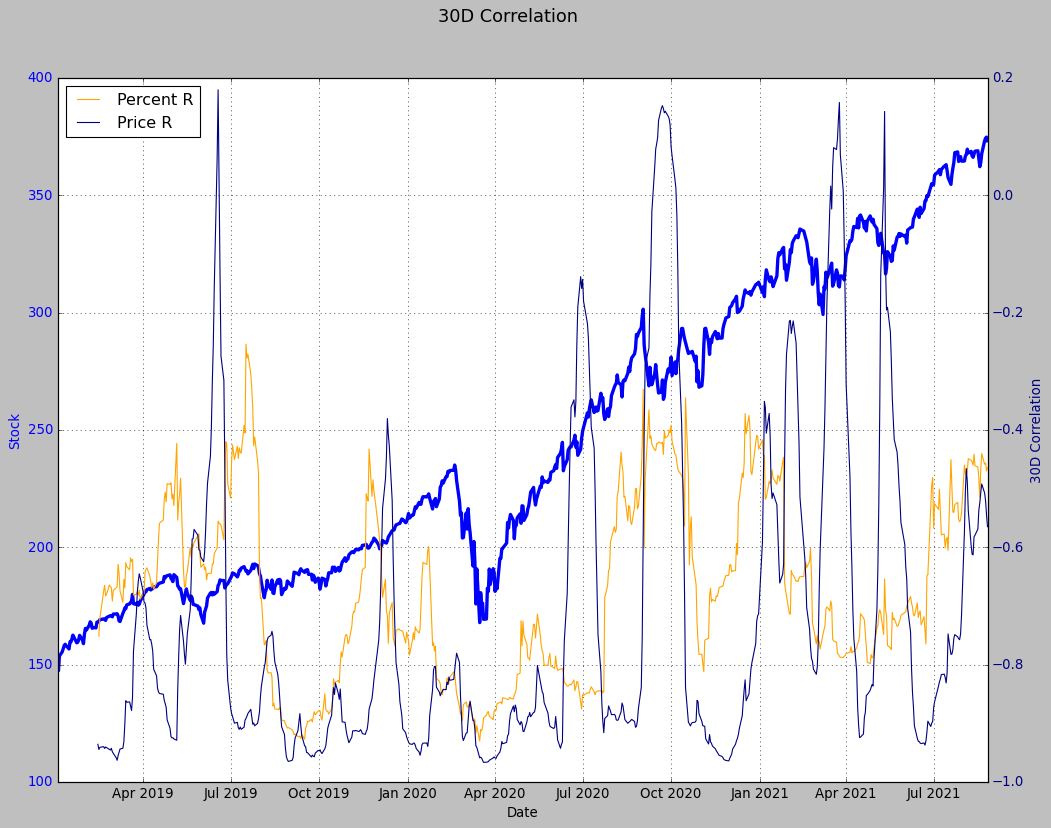

In [9]:
#Chart Correlation on one chart with two axis
plt.style.use('classic')
fig, ax1 = plt.subplots(figsize=(15,11))

ax2 = ax1.twinx()

fig.suptitle('30D Correlation', fontsize=16)

ax1.set_xlabel('Date')
ax1.set_ylabel('Stock', color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.plot(df4['QQQ'], linewidth=3, color="blue")

ax2.set_ylabel('30D Correlation', color="navy")  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor="navy")
ax2.plot(df4['percent_R'], color="orange")
ax2.plot(df4['price_R'], color="navy")

ax1.grid()
plt.legend(['Percent R','Price R'], loc="upper left")

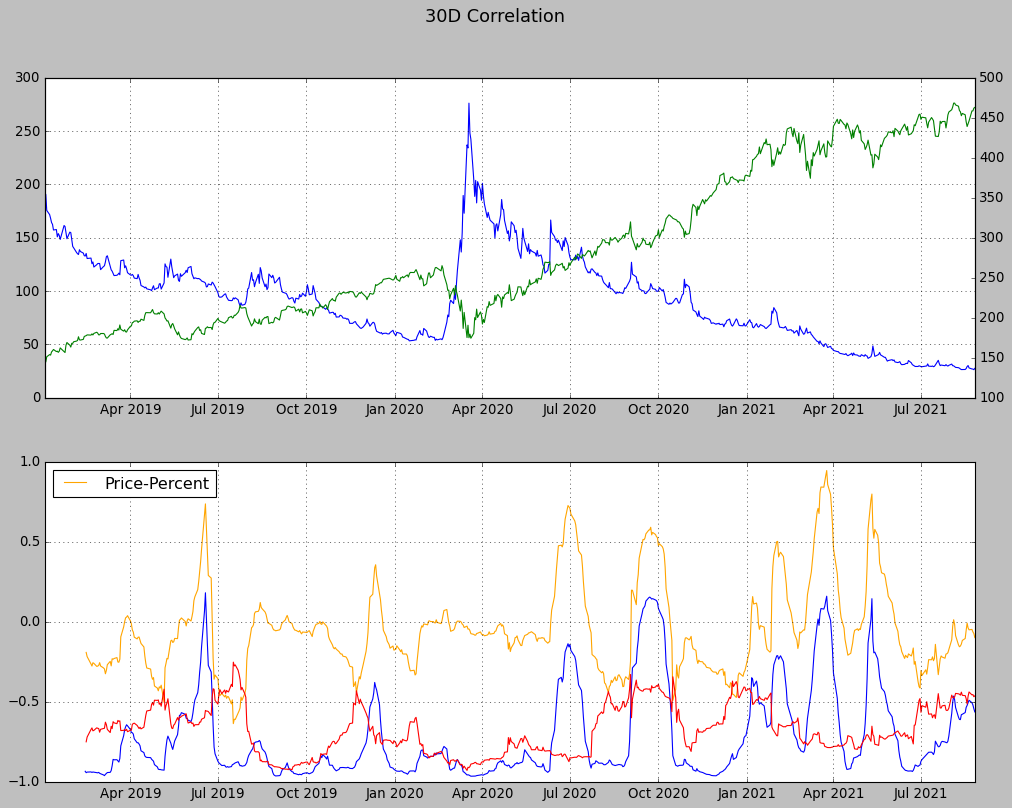

In [10]:
fig, ax1 = plt.subplots(figsize=(15,11))
fig.suptitle('30D Correlation', fontsize=16)

ax1 = plt.subplot(211)
ax1.plot(df4['VXX'], linewidth=1, color="blue")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(df4['price_percent_R'], color="orange")
ax2.plot(df4['price_R'], color="blue")
ax2.plot(df4['percent_R'], color="red")

ax1.grid()
plt.legend(['Price-Percent'], loc="upper left")
ax2.grid()

ax3 = ax1.twinx()
ax3.plot(df4['SOXX'], linewidth=1, color="green")

plt.show()